In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data = pd.read_csv("data/mouse_drug_data.csv")
clinical_trial_data = pd.read_csv("data/clinicaltrial_data.csv")

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_data.head()
clinical_trial_data.head()

# Combine the data into a single dataset
mouse_trial_df = pd.merge(mouse_drug_data, clinical_trial_data, on="Mouse ID", how="outer")

# Display the data table for preview
mouse_trial_df.head()


,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_vol = mouse_trial_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()

# Convert to DataFrame
mean_tumor_df = pd.DataFrame({"Average Tumor Volume" : mean_tumor_vol}).reset_index()

# Preview DataFrame
mean_tumor_df.head()

,Drug,Timepoint,Average Tumor Volume
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
standard_error = mouse_trial_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()

# Convert to DataFrame
standard_error_df = pd.DataFrame({"Average Tumor Volume" : standard_error}).reset_index()

# Preview DataFrame
standard_error_df.head()


,Drug,Timepoint,Average Tumor Volume
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames 
tumor_vol_drugs_df = mean_tumor_df.pivot(index = "Timepoint", columns="Drug",
                                     values = "Average Tumor Volume")

# Preview that Reformatting worked
tumor_vol_drugs_df.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


In [5]:
# Create new dataframe with average tumor volume of only 4 drugs.
reformatted_avg = mean_tumor_df.pivot(index= "Timepoint", columns="Drug",
                                         values="Average Tumor Volume")

capomulin = reformatted_avg["Capomulin"]
infubinol = reformatted_avg["Infubinol"]
ketapril = reformatted_avg["Ketapril"]
placebo = reformatted_avg["Placebo"]

four_drugs_df = pd.DataFrame({"Capomulin" : capomulin,
                             "Infubinol" : infubinol,
                             "Ketapril" : ketapril,
                             "Placebo" : placebo
                             })
four_drugs_df.head()

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589
10,43.084291,49.403909,49.582269,49.423329
15,42.064317,51.296397,52.399974,51.359742
20,40.716325,53.197691,54.920935,54.364417


In [6]:
# Create new dataframe with sem for 4 drugs
reformatted_sem = standard_error_df.pivot(index= "Timepoint", columns = "Drug",
                                         values = "Average Tumor Volume")

capomulin_sem = reformatted_sem["Capomulin"]
infubinol_sem = reformatted_sem["Infubinol"]
ketapril_sem = reformatted_sem["Ketapril"]
placebo_sem = reformatted_sem["Placebo"]

new_sem_df = pd.DataFrame({"Capomulin1" : capomulin_sem,
                             "Infubinol" : infubinol_sem,
                             "Ketapril" : ketapril_sem,
                             "Placebo" : placebo_sem
                             })
new_sem_df.head()

,Capomulin1,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.235102,0.264819,0.218091
10,0.702684,0.282346,0.357421,0.402064
15,0.838617,0.357705,0.580268,0.614461
20,0.909731,0.476210,0.726484,0.839609


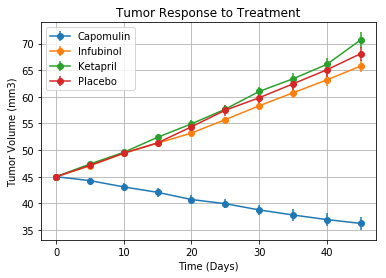

In [7]:
# Create plot with errorbars
x = [0,5,10,15,20,25,30,35,40,45]
plt.errorbar(x, capomulin, capomulin_sem, marker="o") 
plt.errorbar(x, infubinol, infubinol_sem, marker="o")
plt.errorbar(x, ketapril, ketapril_sem, marker="o")
plt.errorbar(x, placebo, placebo_sem, marker="o")
plt.title("Tumor Response to Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid()
plt.legend(loc="best")

#Save Figure
plt.savefig('tumor_response.png')

#Show Figure
plt.show()

## Metastatic Response to Treatment

In [8]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_met_site = mouse_trial_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()

# Convert to DataFrame
mean_met_site_df = pd.DataFrame({"Metastatic Sites" : mean_met_site}).reset_index()

# Preview DataFrame
mean_met_site_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [9]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
met_standard_error = mouse_trial_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()

# Convert to DataFrame
met_standard_error_df = pd.DataFrame({"Metastatic Sites" : met_standard_error}).reset_index()

# Preview DataFrame
met_standard_error_df.head()


,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [10]:
# Minor Data Munging to Re-Format the Data Frames
met_drugs = mean_met_site_df.pivot(index= "Timepoint", columns="Drug",
                                  values = "Metastatic Sites")

# Preview that Reformatting worked
met_drugs.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


In [11]:
# Create new dataframe of metastatic sites for only 4 drugs
reformatted_mets = mean_met_site_df.pivot(index= "Timepoint", columns="Drug",
                                         values="Metastatic Sites")

capomulin_mets = reformatted_mets["Capomulin"]
infubinol_mets = reformatted_mets["Infubinol"]
ketapril_mets = reformatted_mets["Ketapril"]
placebo_mets = reformatted_mets["Placebo"]

met_sites_df = pd.DataFrame({"Capomulin" : capomulin_mets,
                             "Infubinol" : infubinol_mets,
                             "Ketapril" : ketapril_mets,
                             "Placebo" : placebo_mets
                             })
met_sites_df.head()

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000
10,0.320000,0.666667,0.590909,0.833333
15,0.375000,0.904762,0.842105,1.250000
20,0.652174,1.050000,1.210526,1.526316


In [12]:
# Create new dataframe with sem for 4 drugs
reformatted_met_sem = met_standard_error_df.pivot(index="Timepoint", columns="Drug",
                                         values="Metastatic Sites")

capomulin_met_sem = reformatted_met_sem["Capomulin"]
infubinol_met_sem = reformatted_met_sem["Infubinol"]
ketapril_met_sem = reformatted_met_sem["Ketapril"]
placebo_met_sem = reformatted_met_sem["Placebo"]

met_sem_df = pd.DataFrame({"Capomulin" : capomulin_met_sem,
                             "Infubinol" : infubinol_met_sem,
                             "Ketapril" : ketapril_met_sem,
                             "Placebo" : placebo_met_sem
                             })
met_sem_df

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.091652,0.098100,0.100947
10,0.125433,0.159364,0.142018,0.115261
15,0.132048,0.194015,0.191381,0.190221
20,0.161621,0.234801,0.236680,0.234064
25,0.181818,0.265753,0.288275,0.263888
30,0.172944,0.227823,0.347467,0.300264
35,0.169496,0.224733,0.361418,0.341412
40,0.175610,0.314466,0.315725,0.297294


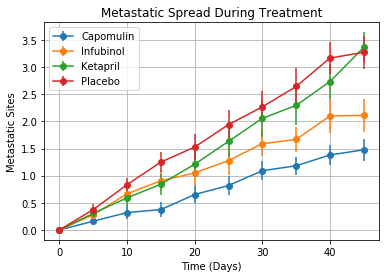

In [13]:
# Create the plot with errorbars
x = [0,5,10,15,20,25,30,35,40,45]
plt.errorbar(x, capomulin_mets, capomulin_met_sem, marker="o") 
plt.errorbar(x, infubinol_mets, infubinol_met_sem, marker="o")
plt.errorbar(x, ketapril_mets, ketapril_met_sem, marker="o")
plt.errorbar(x, placebo_mets, placebo_met_sem, marker="o")
plt.title("Metastatic Spread During Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Sites")
plt.grid()
plt.legend(loc="best")

#Save Figure
plt.savefig('metastatic_sites.png')

#Show Figure
plt.show()

## Survival Rates

In [14]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_count = mouse_trial_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()

# Convert to DataFrame
mice_count_df = pd.DataFrame({"Mouse Count" : mice_count}).reset_index()
mice_count_df.head()
# Preview DataFrame


,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [15]:
# Minor Data Munging to Re-Format the Data Frames
mice_drugs = mice_count_df.pivot(index="Timepoint", columns="Drug",
                                values="Mouse Count")

# Preview the Data Frame
mice_drugs.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


In [16]:
# Create a new dataframe with mice count for 4 drugs
capomulin_mice = mice_drugs["Capomulin"]*4
infubinol_mice = mice_drugs["Infubinol"]*4
ketapril_mice = mice_drugs["Ketapril"]*4
placebo_mice = mice_drugs["Placebo"]*4

survival_df = pd.DataFrame({"Capomulin" : capomulin_mice,
                             "Infubinol" : infubinol_mice,
                             "Ketapril" : ketapril_mice,
                             "Placebo" : placebo_mice
                             })
survival_df.head()

,Capomulin,Infubinol,Ketapril,Placebo
Timepoint,,,,
0,100,100,100,100
5,100,100,92,96
10,100,84,88,96
15,96,84,76,80
20,92,80,76,76


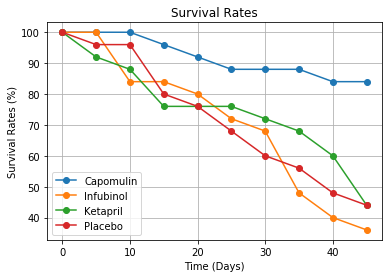

In [17]:
# Create the plot
x = [0,5,10,15,20,25,30,35,40,45]
plt.plot(x, capomulin_mice, marker="o") 
plt.plot(x, infubinol_mice, marker="o")
plt.plot(x, ketapril_mice, marker="o")
plt.plot(x, placebo_mice, marker="o")
plt.title("Survival Rates")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rates (%)")
plt.grid()
plt.legend(loc="best")

#Save Figure
plt.savefig('survival_rates.png')

#Show Figure
plt.show()

## Summary Bar Graph

In [18]:
# Calculate the percent changes for each drug
percent_change = (tumor_vol_drugs_df/tumor_vol_drugs_df.iloc[0,:])*100
new_percent_change = percent_change.iloc[-1,:] - percent_change.iloc[0,:]
new_percent_change

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

In [78]:
# Create new series with only the 4 requested drugs
capomulin_percent = round(new_percent_change["Capomulin"],1)
infubinol_percent = round(new_percent_change["Infubinol"],1)
ketapril_percent = round(new_percent_change["Ketapril"],1)
placebo_percent = round(new_percent_change["Placebo"],1)

drug_list = {"Capomulin": capomulin_percent, "Infubinol": infubinol_percent,
             "Ketapril": ketapril_percent, "Placebo": placebo_percent}
percents = pd.Series(drug_list)
percents

Capomulin   -19.5
Infubinol    46.1
Ketapril     57.0
Placebo      51.3
dtype: float64

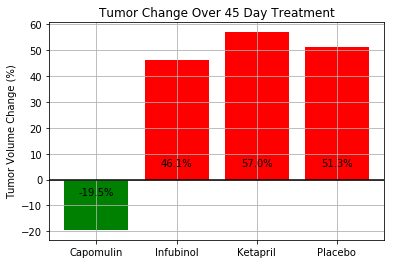

In [79]:
#Create the bar graph
x = np.arange(4)
xlabels = percents.index
plt.bar(x, percents, width=0.8, align = 'center',
        color = ['red' if percents[i] > 0 else 'green' for i in np.arange(len(xlabels))]) 
# Add drug names on x-axis
plt.xticks(np.arange(len(xlabels)), xlabels)
#Add darker horizontal line at y=0
plt.axhline(y=0, color = 'black')

plt.title("Tumor Change Over 45 Day Treatment")
plt.ylabel("Tumor Volume Change (%)")
plt.grid()

#For loop to add percentages correctly on each bar
count = 0
for i in percents:
    if i < 0:
        y_val = -6
    else:
        y_val = 5
    plt.text(count, y_val, str(i) + '%', ha = 'center', color = 'black')
    count += 1

#Save Figure
plt.savefig('summary_bar.png')

#Show Figure
plt.show()